## Домашнее задание №4

#### Горская Елена

Реализован алгоритм LLE, который рассматривался на паре + смотрела тут: https://www.sciencedirect.com/science/article/pii/S187705091730755X.

В качестве параметра задаются: 
* сами данные
* число соседей

Работа алгоритма проверялась на трёх датасетах.

In [ ]:
# библиотеки
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import sklearn
import scipy.optimize as opt
from sklearn import datasets
from sklearn import metrics

In [ ]:
# возвращает список ближайших соседей для каждой точки
def find_neighbours(data, num_neighbours):
  n = data.shape[0]

  # ищем расстрояния между парами точек
  distances = metrics.pairwise_distances(data)

  # сортируем и для каждой точки берем num_neighbours ближайших
  nearest = np.argsort(distances, axis=1)
  neighbours = []
  for i in range(n):
    neighbours.append(nearest[i][1 : num_neighbours + 1])
  
  return np.array(neighbours)

In [ ]:
# поиск матрицы весов
def find_weight_matrix(data, num_neighbours):
  n = data.shape[0]

  neighbours = find_neighbours(data, num_neighbours)
        
  weights = [] 

  for i in range(n):
    x_i = data[i]

    X_matrix = [] # np.zeros((n, n))

    for j in range(num_neighbours):
      x_j = data[neighbours[i][j]]
      X_row = []

      for neigh in neighbours[i]:
          neigh_val = data[neigh]
          X_row.append(np.dot((x_i - x_j), (x_i - neigh_val)))
      X_matrix.append(X_row)
    
    cur_weight = np.linalg.solve(np.array(X_matrix), np.ones((num_neighbours)))
    cur_weight /= np.sum(cur_weight)   

    w_final = np.zeros(n)
    for t in range(len(neighbours[i])):
      neigh = neighbours[i][t]
      w_final[neigh] = cur_weight[t]
    
    weights.append(list(w_final))
  
  weights = np.array(weights)
  
  return weights

In [ ]:
# сам алгоритм LLE
def do_lle(data, num_neighbours):
  weights = find_weight_matrix(data, num_neighbours)
  n = data.shape[0]
  one_matrix = np.eye(n)
  m_matrix = np.dot((one_matrix - weights).T, (one_matrix - weights))
  eig_values, eig_vectors = np.linalg.eig(m_matrix)

  indices = np.argsort(np.abs(eig_values))

  res = eig_vectors[:, indices[1:3]]

  return res

Проверять алгоритм буду на трёх датасетах.

**1. Swiss roll**

In [ ]:
X_roll, color_roll = datasets.make_swiss_roll(n_samples=3000, random_state = 2456)

In [ ]:
res_roll = do_lle(X_roll, 33)

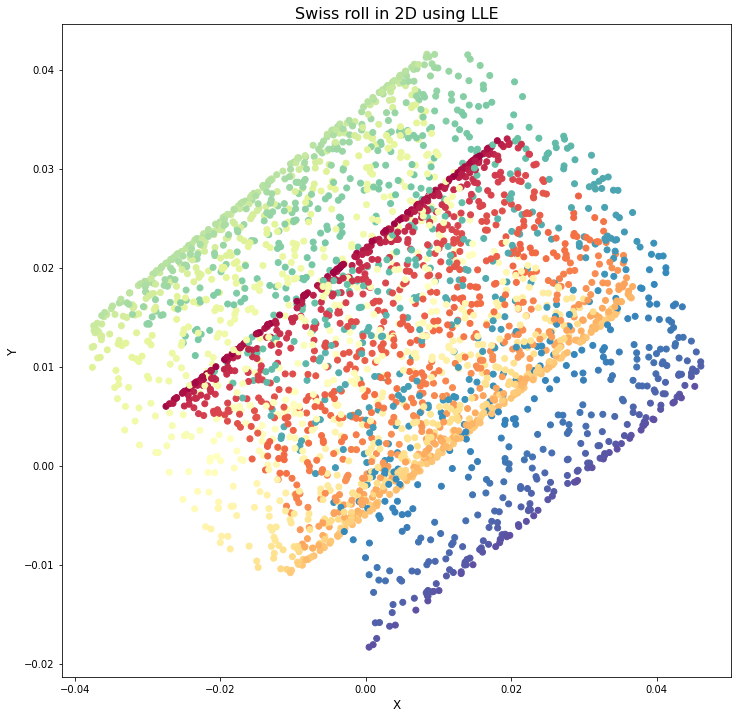

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(res_roll[:, 0], res_roll[:, 1], marker='o', c = color_roll, cmap = "Spectral")
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("Swiss roll in 2D using LLE", fontsize=16)
plt.show()

**2. S curve**

In [ ]:
X_curve, color_curve = datasets.make_s_curve(n_samples=1250, noise = 0.1, random_state = 42)

In [ ]:
res_curve = do_lle(X_curve, 45)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


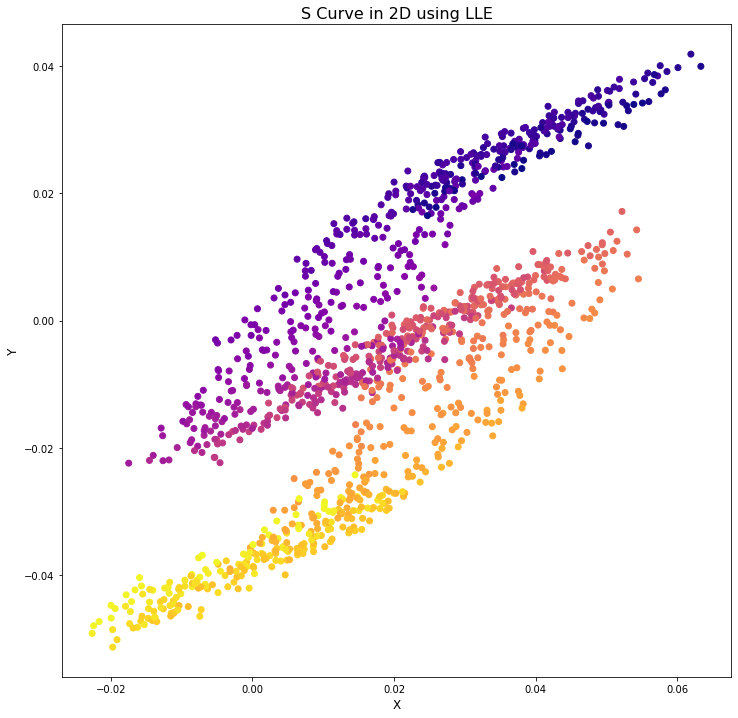

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(res_curve[:, 0], res_curve[:, 1], marker='o', c = color_curve, cmap = "plasma")
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("S Curve in 2D using LLE", fontsize=16)
plt.show()

**3. Сфера**

Построение самой поверхности сферы брала отсюда: https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html

In [ ]:
from sklearn.utils import check_random_state

random_state = check_random_state(0)
p = random_state.rand(2000) * (2 * np.pi - 0.55)
t = random_state.rand(2000) * np.pi

indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]

x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

sphere = []

for i in range(len(x)):
  sphere.append([x[i], y[i], z[i]])

sphere = np.array(sphere)

In [ ]:
res_sphere = do_lle(sphere, 44)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


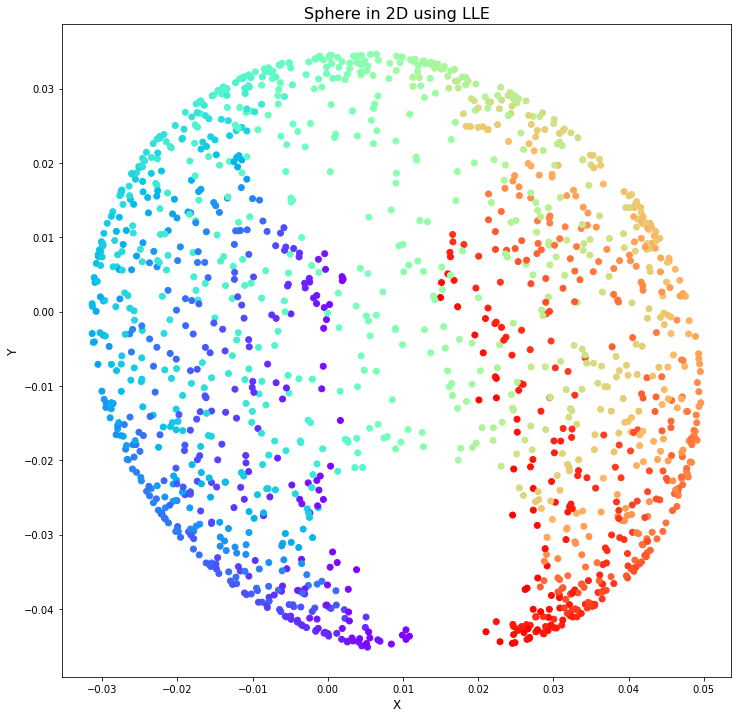

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(res_sphere[:, 0], res_sphere[:, 1], marker='o', c = colors, cmap = "rainbow")
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("Sphere in 2D using LLE", fontsize=16)
plt.show()

Итого: LLE дает довольно неплохие (и вполне логичные) результаты, а также выполняется в течение разумного времени (на 1000-1500 точках работает, в основном, не больше 1 минуты).